In [58]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

from config.plotting import set_plotting_defaults

In [59]:
set_plotting_defaults()

First synchrotron function by definition:
$$ F(x) = x\intop_{x}^{\infty}K_{5/3}(t)\,dt = x \intop_{x}^{\infty} t K_{5/3}(t) \,d\ln{t} $$

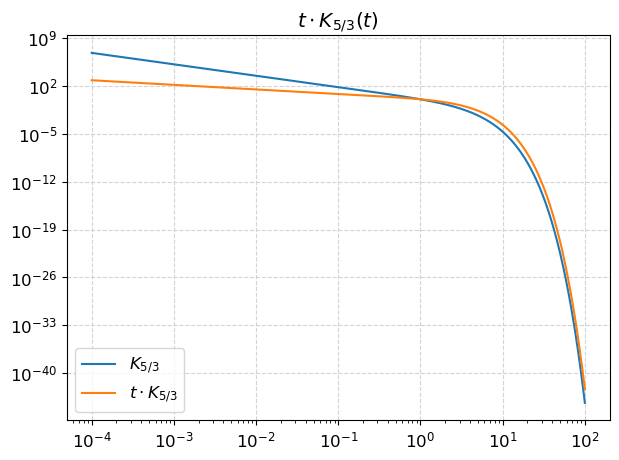

In [60]:
from scipy.special import kv

t = np.logspace(-4, 2, 1000)
K53 = kv(5/3, t)
plt.title(r"$t \cdot K_{5/3}(t)$")
plt.loglog(t, K53, label=r'$K_{5/3}$')
plt.loglog(t, t * K53, label=r'$t \cdot K_{5/3}$')
plt.legend(loc=3)
plt.show()

In [61]:
def first_synchrotron_function(x1):
    t1 = np.logspace(np.log10(x1), 2.2, 12000)
    ln_t1 = np.log(t1)
    k1 = kv(5/3, t1)
    return np.trapezoid(t1 * k1, ln_t1) * x1


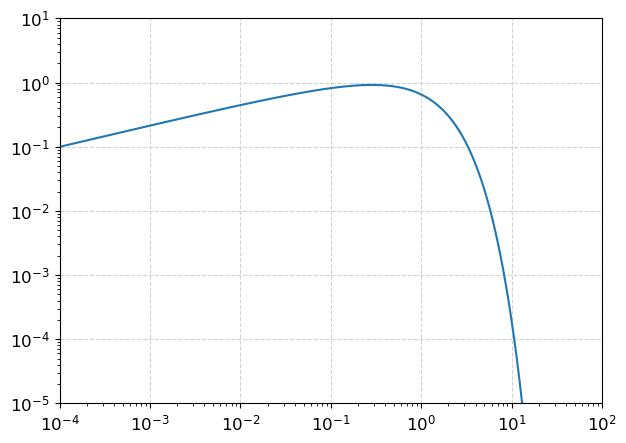

In [62]:
x = np.logspace(-4, 2, 1000)

fsf = np.ones_like(x)

for i in range(len(x)):
    fsf[i] = first_synchrotron_function(x[i])

plt.loglog(x, fsf)
plt.ylim(1e-5, 1e1)
plt.xlim(1e-4, 1e2)
plt.show()

First Synchrotron function as givem by Fouka and Ouichaoui (2013)

$$ F(x) = F_1(x) \cdot \delta_1(x) + F_2(x) \cdot \delta_2(x) $$

<Figure size 800x800 with 0 Axes>

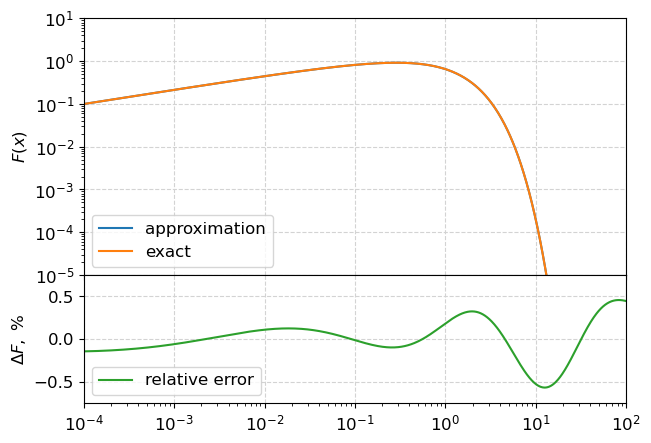

In [63]:
from config.plotting import Tab10
from src.synchrotron_emission import first_synchrtoron_function_approximation


x = np.logspace(-4, 2, 1000)
fsf_a = first_synchrtoron_function_approximation(x)

fig = plt.figure(figsize=(8, 8))

gridspec_kw = dict(height_ratios=[2, 1],
                   hspace=0)

_, axes = plt.subplots(
    nrows=2, ncols=1, sharex=True, gridspec_kw=gridspec_kw,
)

ax1 = axes[0]
ax1.loglog(x, fsf_a, label='approximation')
ax1.loglog(x, fsf, label='exact')
ax1.legend(loc=3)
ax1.set_ylim(1e-5, 1e1)
ax1.set_xlim(1e-4, 1e2)
ax1.set_ylabel(r'$F(x)$')

ax2 = axes[1]
ax2.plot(x, -100 * (fsf_a - fsf) / fsf, label='relative error', color=Tab10[2])
ax2.set_ylabel(r'$\Delta F,$ %')
ax2.set_ylim(-0.75, 0.75)
ax2.legend(loc=3)
plt.show()